In [54]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/ARIMA_Models_in_Python/datasets/'
import pandas as pd

# Ignore warnings
import warnings

warnings.filterwarnings("ignore")


In [55]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coefs = [1,-0.9,0.3]
ma_coefs = [1]

ts_1 = arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, scale=0.5)

ar_coefs = [1]
ma_coefs = [1,0.2,0.6,-0.1]

ts_2 = arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, scale=0.5)


sample = pd.DataFrame({'timeseries_1':ts_1, 'timeseries_2':ts_2})

In [56]:
# exercise 01

"""
Fitting AR and MA models

In this exercise you will fit an AR and an MA model to some data. The data here has been generated using the arma_generate_sample() function we used before.

You know the real AR and MA parameters used to create this data so it is a really good way to gain some confidence with ARMA models and know you are doing it right. In the next exercise you'll move onto some real world data with confidence.

There is a pandas DataFrame available in your environment called sample. It has two columns of different time series data.
"""

# Instructions

"""

    Fit an AR(2) model to the 'timeseries_1' column of sample.
    Print a summary of the fitted model.
---

    Fit an MA(3) model to the 'timeseries_2' column of sample.

"""

# solution

from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(sample['timeseries_1'], order=(2,0,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

#----------------------------------#

# Instantiate the model
model = ARIMA(sample['timeseries_2'], order=(0,0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

#----------------------------------#

# Conclusion

"""
Correct! The fitted models had very similar AR and MA coefficient values to the real ones! You know it works!
"""

                               SARIMAX Results                                
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -738.941
Date:                Thu, 31 Aug 2023   AIC                           1485.882
Time:                        09:16:26   BIC                           1505.513
Sample:                             0   HQIC                          1493.343
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0741      0.039     -1.917      0.055      -0.150       0.002
ar.L1          0.8620      0.030     28.397      0.000       0.802       0.921
ar.L2         -0.2760      0.030     -9.113      0.0

'\nCorrect! The fitted models had very similar AR and MA coefficient values to the real ones! You know it works!\n'

In [57]:
earthquake = pd.read_csv(path_data+'earthquakes.csv', index_col='date', parse_dates=True)
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


In [58]:
# exercise 02

"""
Fitting an ARMA model

In this exercise you will fit an ARMA model to the earthquakes dataset. You saw before that the earthquakes dataset is stationary so you don't need to transform it at all. It comes ready for modeling straight out the ground. You can remind yourself what it looks like below.

The earthquakes dataset is available in your environment as earthquake. The ARIMA class is also available in your environment.
"""

# Instructions

"""

    Instantiate an ARMA(3,1) model and pass it the earthquakes dataset.
    Fit the model.
    Print the summary of the model fit.

"""

# solution

# Instantiate the model
model = ARIMA(earthquake['earthquakes_per_year'], order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

#----------------------------------#

# Conclusion

"""
Seismic work!
"""

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Thu, 31 Aug 2023   AIC                            643.345
Time:                          09:16:27   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

'\nSeismic work!\n'

In [59]:
hospital = pd.read_csv(path_data+'hospital.csv', index_col='date', parse_dates=True)
hospital.head()

,wait_times_hrs,nurse_count
date,,
2019-03-04 00:00:00,1.747261,1.0
2019-03-04 01:00:00,1.664634,1.0
2019-03-04 02:00:00,1.647047,1.0
2019-03-04 03:00:00,1.619512,1.0
2019-03-04 04:00:00,1.480415,1.0


In [60]:
# exercise 03

"""
Fitting an ARMAX model

In this exercise you will fit an ARMAX model to a time series which represents the wait times at an accident and emergency room for urgent medical care.

The variable you would like to model is the wait times to be seen by a medical professional wait_times_hrs. This may be related to an exogenous variable that you measured nurse_count which is the number of nurses on shift at any given time. These can be seen below.

This is a particularly interesting case of time series modeling as, if the number of nurses has an effect, you could change this to affect the wait times.

The time series data is available in your environment as hospital and has the two columns mentioned above. The ARMA class is also available for you.
"""

# Instructions

"""

    Instantiate an ARMAX(2,1) model to train on the 'wait_times_hrs' column of hospital using the 'nurse_count' column as an exogenous variable.
    Fit the model.
    Print the summary of the model fit.

"""

# solution

# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order=(2,0,1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

#----------------------------------#

# Conclusion

"""
Great work! Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?
"""

                               SARIMAX Results                                
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -11.834
Date:                Thu, 31 Aug 2023   AIC                             35.668
Time:                        09:16:28   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1001      0.086     24.375      0.000       1.931       2.269
nurse_count    -0.1171      0.012     -9.562      0.000      -0.141      -0.093
ar.L1           0.5693      0.169      3.365    

'\nGreat work! Look back at the model parameters. What is the relation between the number of nurses on shift and the wait times? If you predicted that tomorrow was going to have long wait times how could you combat this?\n'

In [61]:
amazon = pd.read_csv(path_data+'amazon_close.csv', index_col='date', parse_dates=True).sort_index(ascending=True)

model = ARIMA(amazon, order=(3,1,3))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1259
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5529.555
Date:                Thu, 31 Aug 2023   AIC                          11073.109
Time:                        09:16:29   BIC                          11109.070
Sample:                             0   HQIC                         11086.624
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0679      0.028     -2.460      0.014      -0.122      -0.014
ar.L2         -0.1719      0.025     -6.993      0.000      -0.220      -0.124
ar.L3         -0.9266      0.027    -33.814      0.000      -0.980      -0.873
ma.L1          0.0878      0.028      3.123      0.002       0.033       0.143
ma.L2          0.1314      0.026      5.134      0.000       0.081       0.182
ma.L3          0.9325      0.028     33.164      0.000       0.877       0.988
sigma2       382.6441      6.220     61.521      0.000     370.454     394.835
===================================================================================
Ljung-Box (L1) (Q):                   3.28   Jarque-Bera (JB):              7496.16
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):              15.33   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# exercise 04

"""
Generating one-step-ahead predictions

It is very hard to forecast stock prices. Classic economics actually tells us that this should be impossible because of market clearing.

Your task in this exercise is to attempt the impossible and predict the Amazon stock price anyway.

In this exercise you will generate one-step-ahead predictions for the stock price as well as the uncertainty of these predictions.

A model has already been fitted to the Amazon data for you. The results object from this model is available in your environment as results.
"""

# Instructions

"""

    Use the results object to make one-step-ahead predictions over the latest 30 days of data and assign the result to one_step_forecast.
    Assign your mean predictions to mean_forecast using one of the attributes of the one_step_forecast object.
    Extract the confidence intervals of your predictions from the one_step_forecast object and assign them to confidence_intervals.
    Print your mean predictions.

"""

# solution

# Generate predictions
one_step_forecast = results.get_prediction(start=-50)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

#----------------------------------#

# Conclusion

"""
The predictions told me you could do it! You can use theis one-step-ahead forecast to estimate what your error would be, if you were to make a prediction for the Amazon stock price of tomorrow.
"""

date
2018-11-27    1576.433401
2018-11-28    1569.464786
2018-11-29    1679.217747
2018-11-30    1675.592781
2018-12-03    1702.014626
2018-12-04    1770.626360
2018-12-06    1659.806793
2018-12-07    1694.436060
2018-12-10    1629.037564
2018-12-11    1652.931807
2018-12-12    1645.789418
2018-12-13    1662.223927
2018-12-14    1646.150458
2018-12-17    1589.783490
2018-12-18    1525.177567
2018-12-19    1565.882193
2018-12-20    1492.457233
2018-12-21    1456.970952
2018-12-24    1364.097441
2018-12-26    1350.593667
2018-12-27    1479.065460
2018-12-28    1466.978838
2018-12-31    1471.741473
2019-01-02    1493.965320
2019-01-03    1535.546316
2019-01-04    1505.362334
2019-01-07    1586.167839
2019-01-08    1629.044967
2019-01-09    1649.255294
2019-01-10    1649.352987
2019-01-11    1658.480495
2019-01-14    1648.348243
2019-01-15    1625.766420
2019-01-16    1672.674172
2019-01-17    1673.282572
2019-01-18    1686.563269
2019-01-22    1699.653369
2019-01-23    1641.188520
2019-01

'\nThe predictions told me you could do it! You can use theis one-step-ahead forecast to estimate what your error would be, if you were to make a prediction for the Amazon stock price of tomorrow.\n'

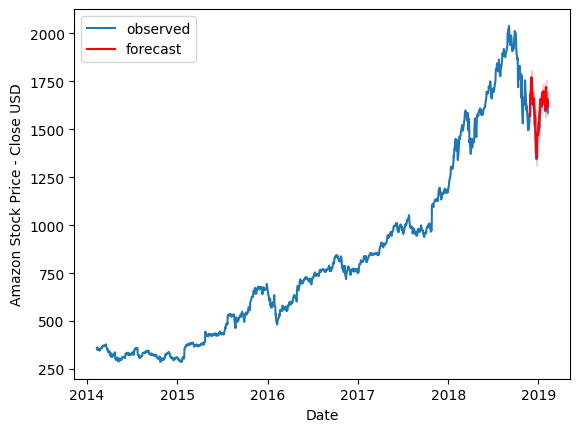

'\nGreat! Have a look at your plotted forecast. Is the mean prediction close to the observed values? Do the observed values lie between the upper and lower limits of your prediction?\n'

In [63]:
# exercise 05

"""
Plotting one-step-ahead predictions

Now that you have your predictions on the Amazon stock, you should plot these predictions to see how you've done.

You made predictions over the latest 30 days of data available, always forecasting just one day ahead. By evaluating these predictions you can judge how the model performs in making predictions for just the next day, where you don't know the answer.

The lower_limits, upper_limits and amazon DataFrames as well as your mean prediction mean_forecast that you created in the last exercise are available in your environment.
"""

# Instructions

"""

    Plot the amazon data, using the amazon.index as the x coordinates.
    Plot the mean_forecast prediction similarly, using mean_forecast.index as the x-coordinates.
    Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of lower_limits as the x coordinates.

"""

# solution

import matplotlib.pyplot as plt

# plot the amazon data
plt.plot(amazon.index, amazon['close'], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Great! Have a look at your plotted forecast. Is the mean prediction close to the observed values? Do the observed values lie between the upper and lower limits of your prediction?
"""

In [64]:
# exercise 06

"""
Generating dynamic forecasts

Now lets move a little further into the future, to dynamic predictions. What if you wanted to predict the Amazon stock price, not just for tomorrow, but for next week or next month? This is where dynamical predictions come in.

Remember that in the video you learned how it is more difficult to make precise long-term forecasts because the shock terms add up. The further into the future the predictions go, the more uncertain. This is especially true with stock data and so you will likely find that your predictions in this exercise are not as precise as those in the last exercise.
"""

# Instructions

"""

    Use the results object to make a dynamic predictions for the latest 30 days and assign the result to dynamic_forecast.
    Assign your predictions to a new variable called mean_forecast using one of the attributes of the dynamic_forecast object.
    Extract the confidence intervals of your predictions from the dynamic_forecast object and assign them to a new variable confidence_intervals.
    Print your mean predictions.

"""

# solution

# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

#----------------------------------#

# Conclusion

"""
Your dynamical predictions are dynamite! Statsmodels makes it super simple to switch between one-step ahead and dynamical predictions.
"""

date
2018-12-27    1479.065460
2018-12-28    1484.751574
2018-12-31    1477.523588
2019-01-02    1469.471060
2019-01-03    1465.991379
2019-01-04    1474.308980
2019-01-07    1481.803668
2019-01-08    1483.089500
2019-01-09    1474.007105
2019-01-10    1467.458285
2019-01-11    1468.272471
2019-01-14    1477.758366
2019-01-15    1483.042431
2019-01-16    1480.298918
2019-01-17    1470.787511
2019-01-18    1467.008675
2019-01-22    1471.442065
2019-01-23    1480.603673
2019-01-24    1482.721094
2019-01-25    1476.894808
2019-01-28    1468.437439
2019-01-29    1468.051044
2019-01-30    1474.929403
2019-01-31    1482.365293
2019-02-01    1481.036275
2019-02-04    1473.475109
2019-02-05    1467.326897
2019-02-06    1470.275319
2019-02-07    1478.137902
2019-02-08    1482.794179
Name: predicted_mean, dtype: float64


'\nYour dynamical predictions are dynamite! Statsmodels makes it super simple to switch between one-step ahead and dynamical predictions.\n'

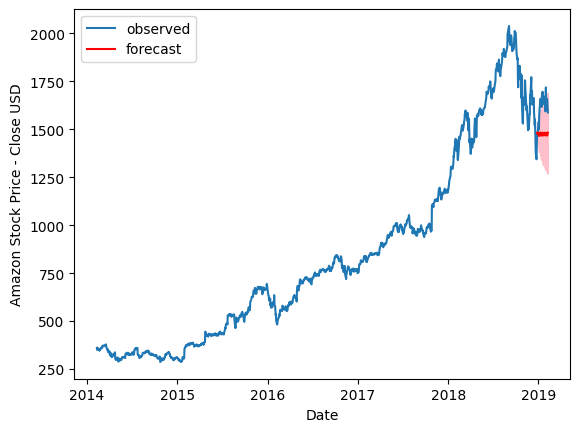

'\nGreat! It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!\n'

In [65]:
# exercise 07

"""
Plotting dynamic forecasts

Time to plot your predictions. Remember that making dynamic predictions, means that your model makes predictions with no corrections, unlike the one-step-ahead predictions. This is kind of like making a forecast now for the next 30 days, and then waiting to see what happens before comparing how good your predictions were.

The lower_limits, upper_limits and amazon DataFrames as well as your mean predictions mean_forecast that you created in the last exercise are available in your environment.
"""

# Instructions

"""

    Plot the amazon data using the dates in the index of this DataFrame as the x coordinates and the values as the y coordinates.
    Plot the mean_forecast predictions similarly.
    Plot a shaded area between lower_limits and upper_limits of your confidence interval. Use the index of one of these DataFrames as the x coordinates.

"""

# solution

# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(mean_forecast.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Great! It is very hard to predict stock market performance and so your predictions have a wide uncertainty. However, note that the real stock data stayed within your uncertainty limits!
"""

In [66]:
# exercise 08

"""
Differencing and fitting ARMA

In this exercise you will fit an ARMA model to the Amazon stocks dataset. As you saw before, this is a non-stationary dataset. You will use differencing to make it stationary so that you can fit an ARMA model.

In the next section you'll make a forecast of the differences and use this to forecast the actual values.

The Amazon stock time series is available in your environment as amazon. The ARIMA model class is also available in your environment.
"""

# Instructions

"""

    Use the .diff() method of amazon to make the time series stationary by taking the first difference. Don't forget to drop the NaN values using the .dropna() method.
    Create an ARMA(2,2) model using the ARIMA class, passing it the stationary data.
    Fit the model.

"""

# solution

# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

#----------------------------------#

# Conclusion

"""
Great. Remember that now you have a model which you can use to predict the difference values, not the absolute value of the amazon dataset.
"""

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Thu, 31 Aug 2023   AIC                          11076.743
Time:                        09:16:32   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9879      0.494      1.999      0.046       0.019       1.957
ar.L1         -0.1541      0.073     -2.119      0.034      -0.297      -0.012
ar.L2          0.7945      0.072     11.089      0.0

'\nGreat. Remember that now you have a model which you can use to predict the difference values, not the absolute value of the amazon dataset.\n'

In [67]:
# exercise 09

"""
Unrolling ARMA forecast

Now you will use the model that you trained in the previous exercise arma in order to forecast the absolute value of the Amazon stocks dataset. Remember that sometimes predicting the difference could be enough; will the stocks go up, or down; but sometimes the absolute value is key.

The results object from the model you trained in the last exercise is available in your environment as arma_results. The np.cumsum() function and the original DataFrame amazon are also available.
"""

# Instructions

"""

    Use the .get_forecast() method of the arima_results object and select the predicted mean of the next 10 differences.
    Use the np.cumsum() function to integrate your difference forecast.
    Add the last value of the original DataFrame to make your forecast an absolute value.

"""

# solution

import numpy as np

# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

#----------------------------------#

# Conclusion

"""
Perfect. You have just made an ARIMA forecast the hard way. Next you'll use statsmodels to make things easier.
"""

1258    1592.064032
1259    1594.212481
1260    1597.290725
1261    1598.878622
1262    1601.434820
1263    1602.657794
1264    1604.855456
1265    1605.843741
1266    1607.792708
1267    1608.632851
Name: predicted_mean, dtype: float64


"\nPerfect. You have just made an ARIMA forecast the hard way. Next you'll use statsmodels to make things easier.\n"

In [68]:
# exercise 10

"""
Fitting an ARIMA model

In this exercise you'll learn how to be lazy in time series modeling. Instead of taking the difference, modeling the difference and then integrating, you're just going to lets statsmodels do the hard work for you.

You'll repeat the same exercise that you did before, of forecasting the absolute values of the Amazon stocks dataset, but this time with an ARIMA model.

A subset of the stocks dataset is available in your environment as amazon and so is the ARIMA model class.
"""

# Instructions

"""

    Create an ARIMA(2,1,2) model, using the ARIMA class, passing it the Amazon stocks data amazon.
    Fit the model.
    Make a forecast of mean values of the Amazon data for the next 10 time steps. Assign the result to arima_value_forecast.

"""

# solution

# Create ARIMA(2,1,2) model
arima = ARIMA(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

#----------------------------------#

# Conclusion

"""
Superb! You just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!
"""

1259    1593.670823
1260    1602.142600
1261    1605.841719
1262    1601.393547
1263    1592.920736
1264    1588.222524
1265    1591.595648
1266    1599.905013
1267    1605.497229
1268    1603.249679
Name: predicted_mean, dtype: float64


'\nSuperb! You just made the same forecast you made before, but this time with an ARIMA model. Your two forecasts give the same results, but the ARIMA forecast was a lot easier to code!\n'